##Cotton-Disease-Prediction


Transfer Learning Inception V3

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# importing the libraries 

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87924736/87910968 [==============================] - 27s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [ ]:
# output layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


## fitting the model

In [ ]:

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 179s 3s/step - loss: 3.8586 - accuracy: 0.6863 - val_loss: 0.0984 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 143s 2s/step - loss: 0.7499 - accuracy: 0.8790 - val_loss: 0.1184 - val_accuracy: 0.8889
Epoch 3/20
61/61 [==============================] - 154s 3s/step - loss: 0.4946 - accuracy: 0.9088 - val_loss: 7.6209e-04 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 170s 3s/step - loss: 0.3874 - accuracy: 0.9226 - val_loss: 0.3076 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 158s 3s/step - loss: 0.5245 - accuracy: 0.9206 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 146s 2s/step - loss: 0.4708 - accuracy: 0.9257 - val_loss: 0.9361 - val_accuracy: 0.8333
Epoch 7/20
61/61 [==============================] - 143s 2s/step - loss: 0.6457 - accuracy: 0.9077 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 8/2

## Plotting loss and accuracy

In [ ]:
import matplotlib.pyplot as plt

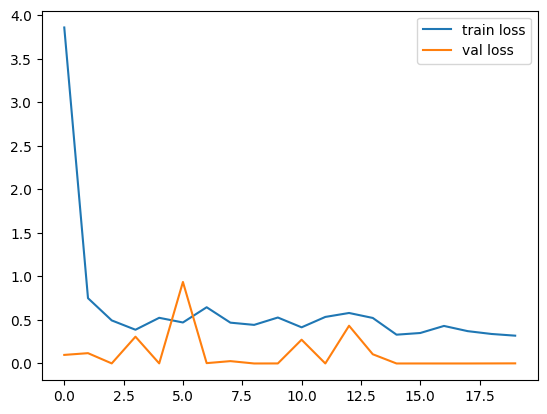

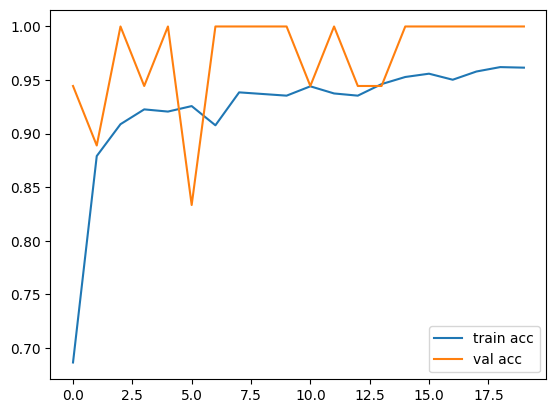

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Saving the model to reuse

In [ ]:

model.save('model_inception.h5')

## predicting using test set 

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[6.1469242e-31, 1.0000000e+00, 2.4507837e-23, 1.1562615e-21],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 3.3046482e-33],
       [1.5192590e-33, 4.1190749e-11, 3.8697584e-36, 1.0000000e+00],
       [1.3011099e-05, 3.6745000e-22, 9.9998701e-01, 2.3979811e-25],
       [9.9489070e-04, 2.3054522e-02, 7.5487437e-12, 9.7595066e-01],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.3679277e-23, 1.0000000e+00, 3.4533165e-13, 7.9510556e-12],
       [5.4845518e-19, 1.1337966e-06, 1.5892180e-19, 9.9999881e-01],
       [1.0000000e+00, 1.2924129e-24, 8.5931303e-22, 0.0000000e+00],
       [9.9999082e-01, 9.1414877e-06, 2.1156142e-17, 1.1822425e-17],
       [1.0000000e+00, 0.0000000e+00, 1.3766444e-22, 9.0400759e-23],
       [2.9452535e-14, 5.3420939e-29, 1.0000000e+00, 4.0071736e-19],
       [5.6099839e-16, 1.0909368e-10, 1.0000000e+00, 4.3097416e-27],
       [2.1849447e-28, 2.3290928e-36, 0.0000000e+00, 1.0000000e+00],
       [3.1775819e-37, 1.0000000e+

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)#getting index having max value

In [ ]:
y_pred

array([1, 1, 3, 2, 3, 1, 1, 3, 0, 0, 0, 2, 2, 3, 1, 2, 3, 2], dtype=int64)

## Predicting a single image

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_inception.h5')

In [ ]:
img=image.load_img('C:\\CottonDiseasePrediction\\Datasets\\train\\fresh cotton leaf\\d (35)_iaip.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[153., 189., 101.],
        [152., 188., 100.],
        [149., 185.,  97.],
        ...,
        [ 52.,  36.,  20.],
        [ 85.,  69.,  53.],
        [107.,  91.,  75.]],

       [[158., 194., 106.],
        [154., 190., 102.],
        [151., 187.,  99.],
        ...,
        [ 86.,  70.,  54.],
        [ 71.,  55.,  39.],
        [107.,  91.,  75.]],

       [[155., 191., 103.],
        [157., 193., 105.],
        [162., 198., 110.],
        ...,
        [123., 107.,  91.],
        [ 76.,  60.,  44.],
        [107.,  91.,  75.]],

       ...,

       [[150., 179., 131.],
        [147., 176., 128.],
        [145., 174., 126.],
        ...,
        [106.,  91.,  70.],
        [ 92.,  77.,  56.],
        [120., 107.,  75.]],

       [[147., 176., 130.],
        [148., 177., 131.],
        [149., 178., 132.],
        ...,
        [132., 117.,  96.],
        [124., 109.,  88.],
        [155., 144.,  99.]],

       [[160., 189., 141.],
        [164., 193., 145.],
        [167., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)

In [ ]:
preds = model.predict(x)
preds=np.argmax(preds, axis=1)
if preds==0:
    preds="The leaf is diseased cotton leaf"
elif preds==1:
    preds="The leaf is diseased cotton plant"
elif preds==2:
    preds="The leaf is fresh cotton leaf"
else:
    preds="The leaf is fresh cotton plant"
print(preds)

The leaf is fresh cotton leaf
